An attempt at ML version 1. Data set is on Heart Failure Prediction found from Kaggle here: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [161]:
%cd C:/Users/saketm1/Desktop/ML_Projects/Week_1_Heart_Failures
%pwd

C:\Users\saketm1\Desktop\ML_Projects\Week_1_Heart_Failures


'C:\\Users\\saketm1\\Desktop\\ML_Projects\\Week_1_Heart_Failures'

In [148]:
!pip install opendatasets

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=de1ef1dce810d04636ba96064114a0f7504449a695b1aee0d6c58c0c8d150e93
  Stored in directory: c:\users\saketm1\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [162]:
#import list
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import opendatasets as od

In [165]:
#loading the dataset initally
od.download("https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data")
#path = "C:/Users/saketm1/Desktop/ML_Projects/Week_1_Heart_Failures/archive/heart_failure_clinical_records_dataset.csv"
path = "C:/Users/saketm1/Desktop/ML_Projects/Week_1_Heart_Failures/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv"
heart_dataset = pd.read_csv(path)

Skipping, found downloaded files in ".\heart-failure-clinical-data" (use force=True to force download)


In [166]:
#getting into the basics
heart_dataset.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [167]:
heart_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [168]:
heart_dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [169]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [170]:
heart_dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
for col in heart_dataset.columns:
    print(col)
    print(len(heart_dataset[col].unique()))
    print(sorted(heart_dataset[col].unique()))

age
47
[40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 60.667, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 75.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 85.0, 86.0, 87.0, 90.0, 94.0, 95.0]
anaemia
2
[0, 1]
creatinine_phosphokinase
208
[23, 30, 47, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 68, 69, 70, 72, 75, 76, 78, 80, 81, 84, 86, 88, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 109, 110, 111, 112, 113, 115, 118, 119, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 135, 143, 144, 145, 146, 148, 149, 151, 154, 156, 157, 159, 160, 161, 166, 167, 168, 170, 171, 176, 180, 185, 190, 191, 193, 196, 198, 200, 203, 207, 211, 212, 213, 220, 224, 231, 232, 233, 235, 244, 245, 246, 248, 249, 250, 253, 257, 258, 260, 270, 280, 281, 291, 292, 298, 305, 308, 315, 318, 320, 326, 328, 335, 336, 337, 358, 364, 369, 371, 379, 395, 400, 418, 427, 446, 478, 482, 514,

Categorical data is already binary encoded so no work to do there. Just taking a quick look at the data most of the ages are integers except a few that are floats, potential data concern there, platlets all end in .0 so there may have been some prior data transformation already done there prior to receiving the dataset. 

<AxesSubplot:>

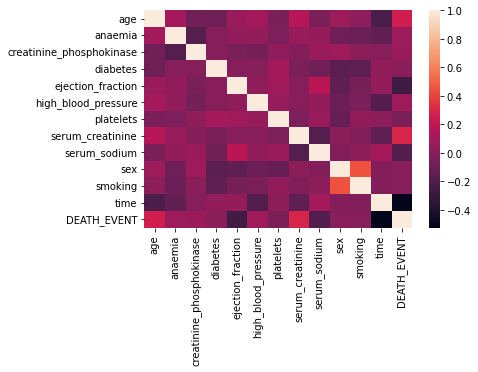

In [12]:
sns.heatmap(heart_dataset.corr())

In [13]:
#playing around with different looks
corr = heart_dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Some initial correlations that really stick out to me as either potentially problematic or to investigate more into is death_event/time, death_event/serum_creatinine, sex/smoking, death_event/age. In a more systematic approach, abs(correlation) >= 0.25 are areas to look more into whether there is some sort of data leakage going on or if there is just a strong relation between the variables.

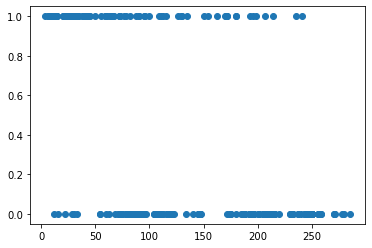

In [14]:
#Lets look into what each individually area of concern
plt.scatter(heart_dataset['time'],heart_dataset['DEATH_EVENT'])

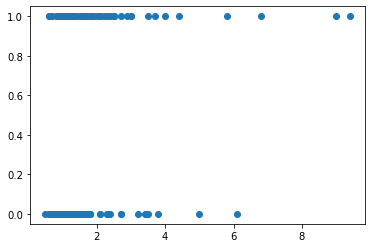

In [85]:
plt.scatter(heart_dataset['serum_creatinine'],heart_dataset['DEATH_EVENT'])

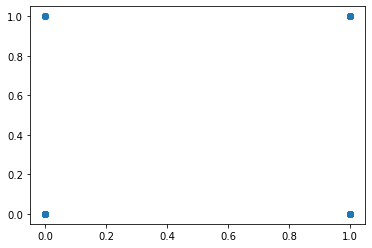

In [86]:
plt.scatter(heart_dataset['sex'],heart_dataset['smoking'])

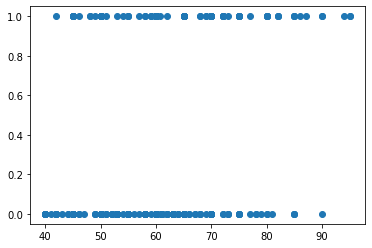

In [87]:
plt.scatter(heart_dataset['age'],heart_dataset['DEATH_EVENT'])

In [49]:
#splitting the data into train and validation sets
y = heart_dataset.DEATH_EVENT
X = heart_dataset.drop(labels='DEATH_EVENT',axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [50]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
102,80.0,0,898,0,25,0,149000.0,1.1,144,1,1,87
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30
95,58.0,1,133,0,60,1,219000.0,1.0,141,1,0,83
67,72.0,1,110,0,25,0,274000.0,1.0,140,1,1,65


In [135]:
kfold = StratifiedKFold(n_splits=5, random_state=1,shuffle=True) #setting up KFolds because dataset is small, and using 7 because its evenly divisible with size of training set
#setting up generic models
log_model = LogisticRegression(solver='liblinear')
knn_model = KNeighborsClassifier(n_neighbors=4)
svm_model = SVC(kernel='linear',random_state=0)
rf_model = RandomForestClassifier(n_estimators=25,random_state=0)
#putting models into one list
model_list = [log_model,knn_model,svm_model,rf_model]
#iterating fits for each model
for model in model_list:
    acc_result = cross_val_score(model,X_train,y_train,cv=kfold)
    print("%s: Initial Accuracy: %.3f%% (%.3f%%)" % (model,acc_result.mean()*100.0, acc_result.std()*100.0))

LogisticRegression(solver='liblinear'): Initial Accuracy: 78.111% (5.393%)
KNeighborsClassifier(n_neighbors=4): Initial Accuracy: 60.747% (5.879%)
SVC(kernel='linear', random_state=0): Initial Accuracy: 75.869% (4.679%)
RandomForestClassifier(n_estimators=25, random_state=0): Initial Accuracy: 79.929% (5.007%)


After doing a cross validation because the dataset is extrmely small, we see that from the 4 initial models, the random forest worked the best. Not entirely surprised at the outcome as ensemble methodology generally perform significantly better than logisitic regression and KNN. Although we cannot find the log loss of SVM because it doesn't predict the probability of a classification, it also doesn't have the highest accuracy and Random Forest had the lowest log_loss, so we willmove forward with that model and work on making it as accurate as possible by changing some the inputs for RandomForestClassifier.

In [179]:
estimate_list = [10,25,50,100,150,200,250,300,400] #number of trees in forest
min_samp_list = [0.01,0.02,0.025,0.05,0.075,0.1] #min samples per leaf of tree prevents overfitting

kfold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

model_acc_stats={}
model_loss_stats={}
model_auc_stats={}
model_f1_stats={}

for n_est in estimate_list:
    #one run through with no restriction on the number of samples per leaf, these may lead to overfitting 
    gen_prac_model = RandomForestClassifier(n_estimators = n_est, min_samples_leaf = min_samp, random_state = 2)
    #checking performance of model with 4 evaluation metrics: accuracy, log loss, roc, and f1    
    acc_result = cross_val_score(gen_prac_model,X_train,y_train,cv=kfold)
    loss_result = cross_val_score(gen_prac_model,X_train,y_train,cv=kfold,scoring='neg_log_loss')
    auc_result = cross_val_score(gen_prac_model,X_train,y_train,cv=kfold,scoring='roc_auc')
    f1_result = cross_val_score(gen_prac_model,X_train,y_train,cv=kfold,scoring='f1')
    #adding all of these to dictionaries for respective model_evaluation metric
    model_acc_stats[gen_prac_model] = acc_result.mean()
    model_loss_stats[gen_prac_model] = loss_result.mean()
    model_auc_stats[gen_prac_model] = auc_result.mean()
    model_f1_stats[gen_prac_model] = f1_result.mean()
    
    for min_samp in min_samp_list:
        #establishing model with 
        prac_model = RandomForestClassifier(n_estimators = n_est, min_samples_leaf = min_samp, random_state = 2)
        
        #checking performance of model with 4 evaluation metrics: accuracy, log loss, roc, and f1    
        acc_result = cross_val_score(prac_model,X_train,y_train,cv=kfold)
        loss_result = cross_val_score(prac_model,X_train,y_train,cv=kfold,scoring='neg_log_loss')
        auc_result = cross_val_score(prac_model,X_train,y_train,cv=kfold,scoring='roc_auc')
        f1_result = cross_val_score(prac_model,X_train,y_train,cv=kfold,scoring='f1')
        
        #adding all of these to dictionaries for respective model_evaluation metric
        model_acc_stats[prac_model] = acc_result.mean()
        model_loss_stats[prac_model] = loss_result.mean()
        model_auc_stats[prac_model] = auc_result.mean()
        model_f1_stats[prac_model] = f1_result.mean()

#once all the models have been tested, getting the best performing model from all the dictionaries
#the best performance from each list will be used as a final test model against the validation data
acc_model_test = max(model_acc_stats, key=model_acc_stats.get)
loss_model_test = max(model_loss_stats, key=model_loss_stats.get)
auc_model_test = max(model_auc_stats, key=model_auc_stats.get)
f1_model_test = max(model_f1_stats, key=model_f1_stats.get)

#showing the results
print("Best Accuracy Model: %s %.3f%%" %(acc_model_test, model_acc_stats[acc_model_test]*100))
print("Best Log-Loss Model: %s %.3f" %(loss_model_test, model_loss_stats[loss_model_test]))
print("Best ROC-AUC Mode: %s %.3f" %(auc_model_test, model_auc_stats[auc_model_test]))
print("Best F1 Model: %s %.3f" %(f1_model_test, model_f1_stats[f1_model_test]))

Best Accuracy Model: RandomForestClassifier(min_samples_leaf=0.01, n_estimators=250, random_state=2) 85.263%
Best Log-Loss Model: RandomForestClassifier(min_samples_leaf=0.02, n_estimators=50, random_state=2) -0.407
Best ROC-AUC Mode: RandomForestClassifier(min_samples_leaf=0.1, random_state=2) 0.895
Best F1 Model: RandomForestClassifier(min_samples_leaf=0.01, n_estimators=250, random_state=2) 0.772


Ok we see that these two models performed the best under two different metrics, so we will put them through one final test using the real validation set and see which performed the best.

In [181]:
#creating a tuple with the best models from above and creating a dictionary with their results
model_list = [acc_model_test,loss_model_test,auc_model_test,f1_model_test]
accuracy_list = {}

#fitting the model with the training data then evaluating its performance with the validation data
for model in model_list:
    model.fit(X_train,y_train)
    pred_result = model.predict(X_val)
    score = accuracy_score(y_val,pred_result)
    accuracy_list[model] = score
   
#showing the final model that performed the best with the validation data predictions
final_model = max(accuracy_list, key=accuracy_list.get)
print(final_model)
print("Accuracy Of Validation: %.3f%%" %(accuracy_list[final_model]*100))

RandomForestClassifier(min_samples_leaf=0.01, n_estimators=250, random_state=2)
Accuracy Of Validation: 90.667%


After performing an analysis on different types of overarching models: SVM, Logisitic Regression, Random Forest, and KNN, we found that overall the ensemble Random Forest model performed the best. Following that procedure, we looked into maximizing the input variables of the Random Forest looking at the number of models for the ensemble and the minimum number of leaves to avoid overfitting and underfitting. We evaluated the models using 4 metrics: accuracy, log-loss,auc-roc, and f1. The best performance of each model was then tested against the validation leaving us with our perferred best model: a Random Forest with 1% minimum leaves and 250 estimator ensemble model.